### Import the JSON File with Industry Lab Sensor Data

In [1]:

import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_915ea66450e44183938b1aab8572887f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='x8LKJUWfwBvzMvyp4glOaZk6VQOcrYmbWV80lKToccNW',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_915ea66450e44183938b1aab8572887f.get_object(Bucket='dsbootcampac3431d743f2492ebe1cfe6103674873',Key='floorsensordata2604.json')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object 

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# Since JSON data can be semi-structured and contain additional metadata, it is possible that you might face an error during data loading.
# Please read the documentation of 'pandas.read_json()' and 'pandas.io.json.json_normalize' to learn more about the possibilities to adjust the data loading.
# pandas documentation: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
# and http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.json.json_normalize.html

df_data_1 = pd.read_json(body, orient='values')
df_data_1.head()



Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20191012092552-0001
KERNEL_ID = 0d6d6943-03e4-443c-b130-91b28f6feed8


,itemname,sensorname,time,value
0,52760_5_temperature_value,item0001,2018-02-19T07:05:00.165Z,20.5
1,47406_3_temperature_value,item0002,2018-02-19T07:05:00.240Z,20.61
2,452B5_3_temperature_value,item0003,2018-02-19T07:05:00.316Z,19.89
3,452F9_3_temperature_value,item0004,2018-02-19T07:05:00.388Z,19.7
4,4521C_3_temperature_value,item0005,2018-02-19T07:05:00.460Z,18.89


### Check the Structure of the Data Frame

In [2]:
df = df_data_1

In [3]:
df.head(10)

,itemname,sensorname,time,value
0,52760_5_temperature_value,item0001,2018-02-19T07:05:00.165Z,20.5
1,47406_3_temperature_value,item0002,2018-02-19T07:05:00.240Z,20.61
2,452B5_3_temperature_value,item0003,2018-02-19T07:05:00.316Z,19.89
3,452F9_3_temperature_value,item0004,2018-02-19T07:05:00.388Z,19.7
4,4521C_3_temperature_value,item0005,2018-02-19T07:05:00.460Z,18.89
5,51A51_5_temperature_value,item0006,2018-02-19T07:05:00.534Z,21.812
6,512F5_5_temperature_value,item0007,2018-02-19T07:05:00.607Z,21
7,45974_3_temperature_value,item0008,2018-02-19T07:05:00.687Z,21.06
8,52686_5_temperature_value,item0009,2018-02-19T07:05:00.760Z,21
9,45152_3_temperature_value,item0010,2018-02-19T07:05:00.839Z,20.2


In [4]:
df.tail(10)

,itemname,sensorname,time,value
760514,476CA_4_carbonDioxide_value,item0131,2018-04-26T14:00:03.218Z,798
760515,46CF4_4_carbonDioxide_value,item0104,2018-04-26T14:00:03.259Z,543
760516,45974_4_carbonDioxide_value,item0122,2018-04-26T14:00:03.280Z,744
760517,4692E_4_carbonDioxide_value,item0114,2018-04-26T14:00:03.301Z,795
760518,South_Workarea_3_Air,item0157,2018-04-26T14:00:03.321Z,500
760519,47406_4_carbonDioxide_value,item0126,2018-04-26T14:00:03.341Z,641
760520,47888_4_carbonDioxide_value,item0083,2018-04-26T14:00:03.362Z,896
760521,45C72_4_carbonDioxide_value,item0109,2018-04-26T14:00:03.383Z,730
760522,46C8A_4_carbonDioxide_value,item0072,2018-04-26T14:00:03.403Z,565
760523,Loisach_Occupancy,item0146,2018-04-26T14:00:52.918Z,occupied


In [5]:
df.itemname.unique()

array(['52760_5_temperature_value', '47406_3_temperature_value',
       '452B5_3_temperature_value', '452F9_3_temperature_value',
       '4521C_3_temperature_value', '51A51_5_temperature_value',
       '512F5_5_temperature_value', '45974_3_temperature_value',
       '52686_5_temperature_value', '45152_3_temperature_value',
       '51BEB_5_temperature_value', '45A95_3_temperature_value',
       '516AF_5_temperature_value', '51711_5_temperature_value',
       '51B62_5_temperature_value', '476CA_3_temperature_value',
       '51174_5_temperature_value', '511D3_5_temperature_value',
       '45A94_3_temperature_value', '5161B_5_temperature_value',
       '454CA_3_temperature_value', '510FD_5_temperature_value',
       '4562F_3_temperature_value', '51A63_5_temperature_value',
       '51B5C_5_temperature_value', '47888_3_temperature_value',
       '451E8_3_temperature_value', '5131F_5_temperature_value',
       '51C0A_5_temperature_value', '46C8A_3_temperature_value',
       '52259_5_temperatu

### Format Yanzi Sensor Data 

In [6]:
df['id'] = df['itemname'].str.split('_').str[0]

In [7]:
df['temperature'] = df[df['itemname'].str.contains('temperature')]['value'].astype(float)
df['carbonDioxide'] = df[df['itemname'].str.contains('carbonDioxide')]['value'].astype(float)
df['humidity'] = df[df['itemname'].str.contains('humidity')]['value'].astype(float)
df['illuminance'] = df[df['itemname'].str.contains('illuminance')]['value'].astype(float)
df['pressure'] = df[df['itemname'].str.contains('pressure')]['value'].astype(float)
df['Occupancy'] = df[df['itemname'].str.contains('Occupancy')]['value']

In [8]:
df.head()

,itemname,sensorname,time,value,id,temperature,carbonDioxide,humidity,illuminance,pressure,Occupancy
0,52760_5_temperature_value,item0001,2018-02-19T07:05:00.165Z,20.5,52760,20.50,NaN,NaN,NaN,NaN,NaN
1,47406_3_temperature_value,item0002,2018-02-19T07:05:00.240Z,20.61,47406,20.61,NaN,NaN,NaN,NaN,NaN
2,452B5_3_temperature_value,item0003,2018-02-19T07:05:00.316Z,19.89,452B5,19.89,NaN,NaN,NaN,NaN,NaN
3,452F9_3_temperature_value,item0004,2018-02-19T07:05:00.388Z,19.7,452F9,19.70,NaN,NaN,NaN,NaN,NaN
4,4521C_3_temperature_value,item0005,2018-02-19T07:05:00.460Z,18.89,4521C,18.89,NaN,NaN,NaN,NaN,NaN


In [9]:
df.tail()

,itemname,sensorname,time,value,id,temperature,carbonDioxide,humidity,illuminance,pressure,Occupancy
760519,47406_4_carbonDioxide_value,item0126,2018-04-26T14:00:03.341Z,641,47406,NaN,641.0,NaN,NaN,NaN,NaN
760520,47888_4_carbonDioxide_value,item0083,2018-04-26T14:00:03.362Z,896,47888,NaN,896.0,NaN,NaN,NaN,NaN
760521,45C72_4_carbonDioxide_value,item0109,2018-04-26T14:00:03.383Z,730,45C72,NaN,730.0,NaN,NaN,NaN,NaN
760522,46C8A_4_carbonDioxide_value,item0072,2018-04-26T14:00:03.403Z,565,46C8A,NaN,565.0,NaN,NaN,NaN,NaN
760523,Loisach_Occupancy,item0146,2018-04-26T14:00:52.918Z,occupied,Loisach,NaN,NaN,NaN,NaN,NaN,occupied


In [10]:
df.describe()

,temperature,carbonDioxide,humidity,illuminance,pressure
count,342704.000000,50509.000000,160660.000000,102881.000000,58900.000000
mean,22.124608,531.344414,16.940346,162.919545,943.730369
std,1.815222,168.712879,5.128360,449.858628,8.895958
min,12.930000,395.000000,4.000000,0.000000,922.680000
25%,21.000000,412.000000,14.000000,0.460000,936.760000
50%,22.000000,472.000000,17.000000,14.720000,944.010000
75%,23.230000,579.000000,20.000000,162.380000,950.040000
max,32.780000,2215.000000,34.000000,15857.580000,967.260000


### Visualize Data with Pixidust

In [11]:
import pixiedust

Pixiedust database opened successfully


In [12]:
#!pip install --user --upgrade pixiedust

In [13]:
display(df)

### Filter on Shinano and Fill Missing Values

In [14]:
df_shinano = df[df['id'].isin(['4674C', 'Shinano'])].copy()

In [15]:
df_shinano.sort_values(by='time', inplace=True)

In [16]:
df_shinano.index = pd.to_datetime(df_shinano.time)

In [17]:
df_shinano.fillna(method='ffill', inplace=True)

In [18]:
df_shinano.fillna(method='bfill', inplace=True)

In [19]:
df_shinano.head()

,itemname,sensorname,time,value,id,temperature,carbonDioxide,humidity,illuminance,pressure,Occupancy
time,,,,,,,,,,,
2018-02-19 07:05:05.008000+00:00,4674C_3_temperature_value,item0066,2018-02-19T07:05:05.008Z,18.5,4674C,18.50,455.0,16.0,NaN,950.51,free
2018-02-19 07:10:00.118000+00:00,4674C_4_carbonDioxide_value,item0095,2018-02-19T07:10:00.118Z,455,4674C,18.50,455.0,16.0,NaN,950.51,free
2018-02-19 07:15:01.061000+00:00,4674C_6_pressure_value,item0096,2018-02-19T07:15:01.061Z,950.51,4674C,18.50,455.0,16.0,NaN,950.51,free
2018-02-19 07:15:01.460000+00:00,4674C_3_humidity_value,item0094,2018-02-19T07:15:01.460Z,16,4674C,18.50,455.0,16.0,NaN,950.51,free
2018-02-19 07:15:01.574000+00:00,4674C_3_temperature_value,item0066,2018-02-19T07:15:01.574Z,18.58,4674C,18.58,455.0,16.0,NaN,950.51,free


In [20]:
df_shinano.drop(['illuminance'], axis=1, inplace=True)

In [21]:
df_shinano.describe()

,temperature,carbonDioxide,humidity,pressure
count,22744.000000,22744.000000,22744.000000,22744.000000
mean,21.716864,617.600114,17.815732,941.909597
std,2.472216,232.130746,3.968186,8.905109
min,15.210000,398.000000,7.000000,922.980000
25%,20.280000,431.000000,15.000000,934.630000
50%,21.720000,558.000000,18.000000,942.615000
75%,22.810000,706.000000,20.000000,948.130000
max,32.780000,2215.000000,31.000000,962.590000


In [22]:
df_shinano.Occupancy.unique()

array(['free', 'occupied'], dtype=object)

In [23]:
df_shinano.groupby('Occupancy')['time'].nunique()

Occupancy
free        16948
occupied     5796
Name: time, dtype: int64

### Plot Sensor Values depending on Occupancy State

In [24]:
import matplotlib.pyplot as plt

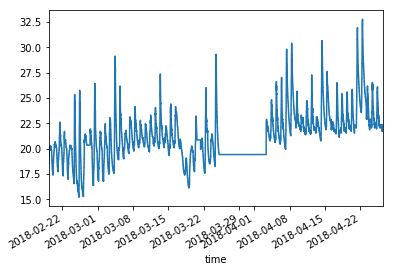

In [25]:
df_shinano.temperature.plot()

### Build Simple Prediction Model

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df_shinano_model = df_shinano.copy()

In [28]:
df_shinano_model.loc[df_shinano_model.Occupancy == 'free', 'Occupancy'] = 0
df_shinano_model.loc[df_shinano_model.Occupancy == 'occupied', 'Occupancy'] = 1

In [29]:
y = df_shinano_model['Occupancy'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
X = df_shinano_model.loc[:, ['temperature', 'carbonDioxide', 'humidity', 'pressure']].values
X

array([[ 18.5 , 455.  ,  16.  , 950.51],
       [ 18.5 , 455.  ,  16.  , 950.51],
       [ 18.5 , 455.  ,  16.  , 950.51],
       ...,
       [ 22.22, 815.  ,  21.  , 949.91],
       [ 22.39, 815.  ,  21.  , 949.91],
       [ 22.39, 812.  ,  21.  , 949.91]])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve

In [33]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [34]:
clf = RandomForestClassifier(n_estimators=10)

In [35]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
clf.score(X_test, y_test)

0.9316333260057156

In [37]:
predictions = clf.predict(X_test)

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3377
           1       0.87      0.87      0.87      1172

   micro avg       0.93      0.93      0.93      4549
   macro avg       0.91      0.91      0.91      4549
weighted avg       0.93      0.93      0.93      4549



/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


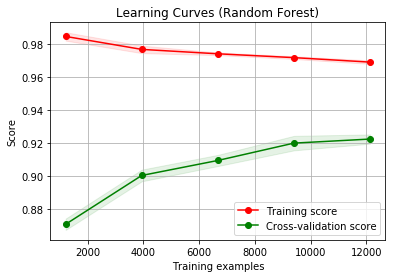

In [39]:
title = 'Learning Curves (Random Forest)'
estimator = clf
plot_learning_curve(estimator, title, X_train, y_train)
plt.show()